# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as date
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = url = "https://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | tuam
Processing Record 3 of Set 1 | ilulissat
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | shambu
Processing Record 6 of Set 1 | cam ranh
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | linshui
Processing Record 9 of Set 1 | al khums
Processing Record 10 of Set 1 | esmeralda
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | sinabang
Processing Record 16 of Set 1 | villa gesell
Processing Record 17 of Set 1 | fort bragg
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | invercargill
Processing Record 21 of Set 1 | brookings
Processing Record 22 of Set 1 | whistler
Processing 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,2.09,67,48,13.07,TF,1698084429
1,tuam,53.5167,-8.8500,11.24,95,100,5.39,IE,1698084563
2,ilulissat,69.2167,-51.1000,-2.99,74,75,2.06,GL,1698084326
3,hermanus,-34.4187,19.2345,15.57,87,3,6.73,ZA,1698084276
4,shambu,9.5667,37.1000,11.79,87,97,0.41,ET,1698084564


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.09,67,48,13.07,TF,1698084429
1,tuam,53.5167,-8.8500,11.24,95,100,5.39,IE,1698084563
2,ilulissat,69.2167,-51.1000,-2.99,74,75,2.06,GL,1698084326
3,hermanus,-34.4187,19.2345,15.57,87,3,6.73,ZA,1698084276
4,shambu,9.5667,37.1000,11.79,87,97,0.41,ET,1698084564


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

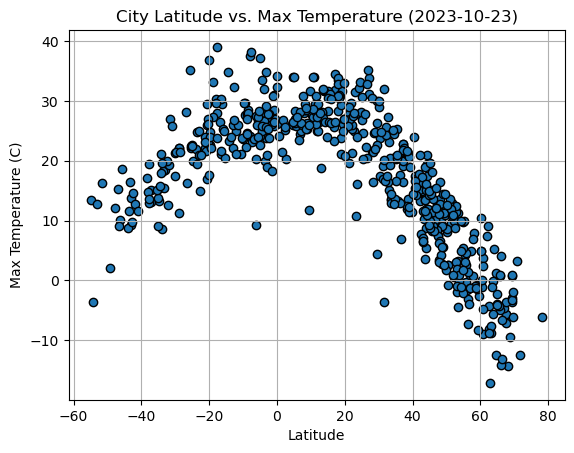

In [8]:
# Build scatter plot for latitude vs. temperature
Lat = city_data_df["Lat"]
Temp = city_data_df["Max Temp"]
plt.scatter(Lat,Temp,edgecolors="black")

# Incorporate the other graph properties
data_date = city_data_df["Date"].values[0]
data_date = date.date.fromtimestamp(data_date)

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'City Latitude vs. Max Temperature ({data_date})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

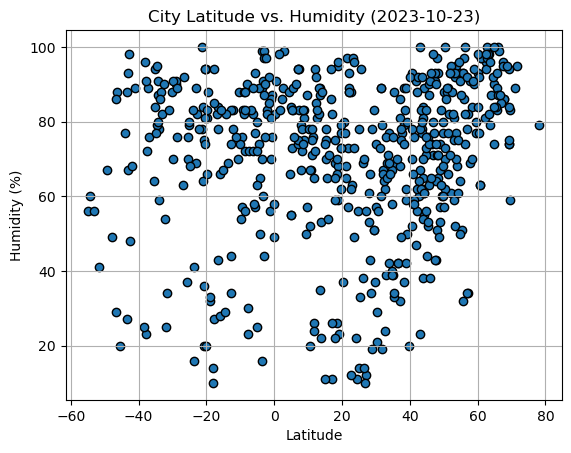

In [9]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Humidity"]
plt.scatter(Lat,humidity,edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({data_date})')
plt.grid()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

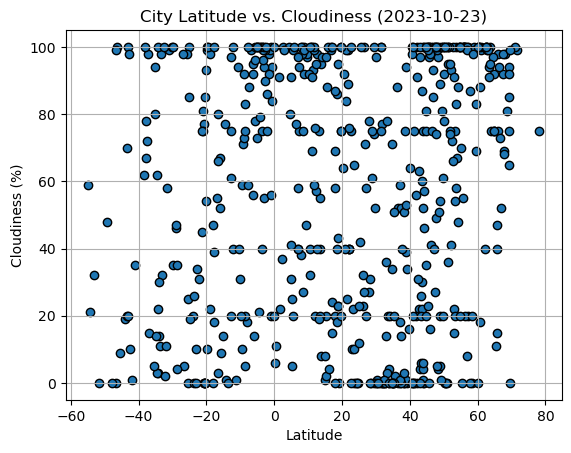

In [10]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df["Cloudiness"]
plt.scatter(Lat,cloudiness,edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({data_date})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

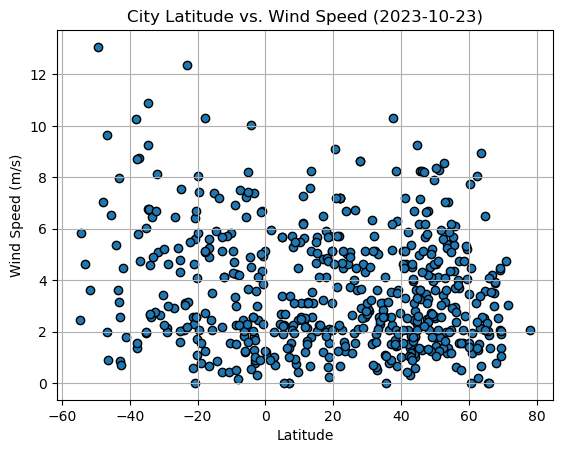

In [11]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df["Wind Speed"]
plt.scatter(Lat,wind_speed,edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Latitude vs. Wind Speed ({data_date})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linregress_plots(x_value,y_value,xlabel,ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_value,y_value)
    plt.plot(x_value,regress_values,"r-")

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line_eq,(0.2,0.2),xycoords='figure fraction',fontsize=15,color="red")
    
    print(f'The Pearson Coerrelation Coefficient, r = {rvalue}\nThe Coefficient of Determination r-saqured = {rvalue**2}')
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tuam,53.5167,-8.8500,11.24,95,100,5.39,IE,1698084563
2,ilulissat,69.2167,-51.1000,-2.99,74,75,2.06,GL,1698084326
4,shambu,9.5667,37.1000,11.79,87,97,0.41,ET,1698084564
5,cam ranh,11.9214,109.1591,24.98,94,20,3.09,VN,1698084565
6,iqaluit,63.7506,-68.5145,-0.17,79,100,8.94,CA,1698084456


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.09,67,48,13.07,TF,1698084429
3,hermanus,-34.4187,19.2345,15.57,87,3,6.73,ZA,1698084276
11,puerto ayora,-0.7393,-90.3518,30.98,87,84,4.92,EC,1698084440
15,villa gesell,-37.2639,-56.9730,15.15,89,98,8.73,AR,1698084572
17,grytviken,-54.2811,-36.5092,-3.65,60,21,5.82,GS,1698084430


###  Temperature vs. Latitude Linear Regression Plot

The Pearson Coerrelation Coefficient, r = -0.8819834990716349
The Coefficient of Determination r-saqured = 0.7778948926346445


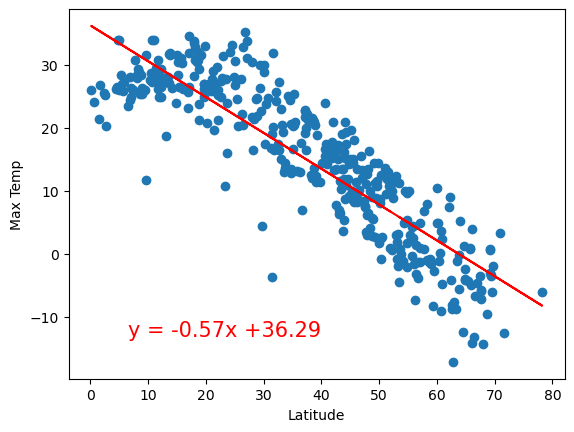

In [17]:
# Linear regression on Northern Hemisphere
north_lat = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Max Temp"]
xlabel = "Latitude"
ylabel = "Max Temp"

linregress_plots(north_lat,y_value,xlabel,ylabel)

The Pearson Coerrelation Coefficient, r = 0.722561303810359
The Coefficient of Determination r-saqured = 0.5220948377641259


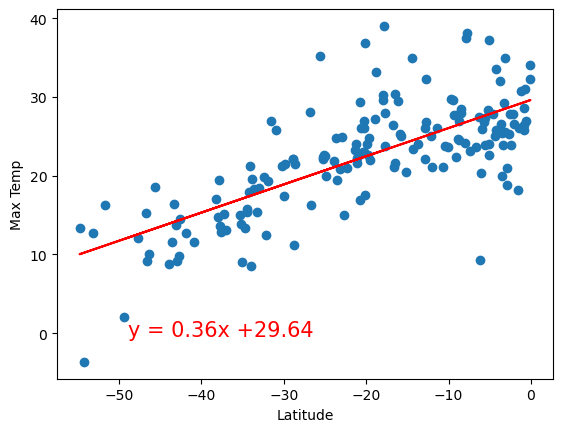

In [18]:
# Linear regression on Southern Hemisphere
south_lat = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Max Temp"]
xlabel = "Latitude"
ylabel = "Max Temp"

linregress_plots(south_lat,y_value,xlabel,ylabel)

**Discussion about the linear relationship:** As you can see the Northern Hemisphere Latitude vs Max Temp shows a strong negative correlation with r = -0.88 and r-squared = 0.77 and The Southern Hemisphere Lattitude vs Max Temp shows a strong positive correlation with r = 0.72 and r-squared = 0.52. 

### Humidity vs. Latitude Linear Regression Plot

The Pearson Coerrelation Coefficient, r = 0.2334932633208299
The Coefficient of Determination r-saqured = 0.05451910401621041


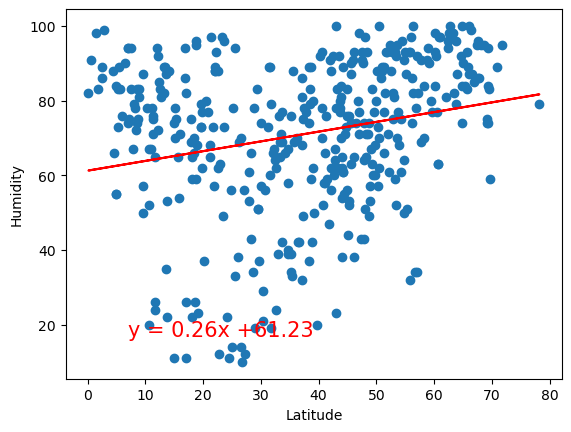

In [21]:
# Northern Hemisphere
north_lat = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Humidity"]
ylabel = "Humidity"

linregress_plots(north_lat,y_value,xlabel,ylabel)

The Pearson Coerrelation Coefficient, r = 0.07348230723984268
The Coefficient of Determination r-saqured = 0.005399649477290636


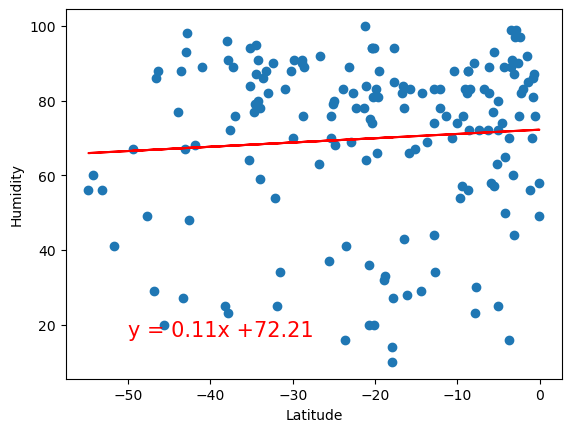

In [23]:
# Southern Hemisphere
south_lat = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Humidity"]
ylabel = "Humidity"

linregress_plots(south_lat,y_value,xlabel,ylabel)

**Discussion about the linear relationship:** As you can see it is not possible to see a meaningful correlation between the Hemispheres and humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The Pearson Coerrelation Coefficient, r = 0.14107353279151694
The Coefficient of Determination r-saqured = 0.019901741654279204


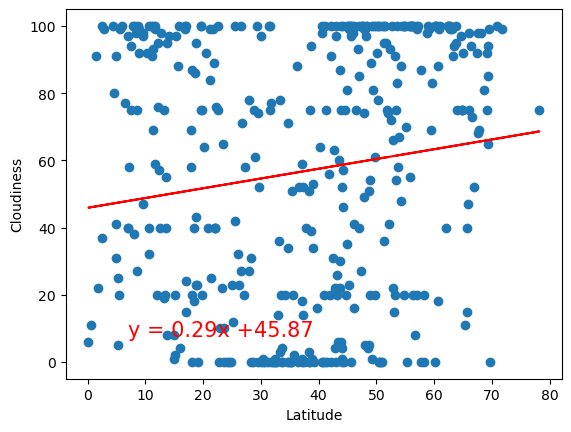

In [25]:
# Northern Hemisphere
north_lat = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Cloudiness"]
ylabel = "Cloudiness"

linregress_plots(north_lat,y_value,xlabel,ylabel)

The Pearson Coerrelation Coefficient, r = 0.31155978810032603
The Coefficient of Determination r-saqured = 0.09706950156112006


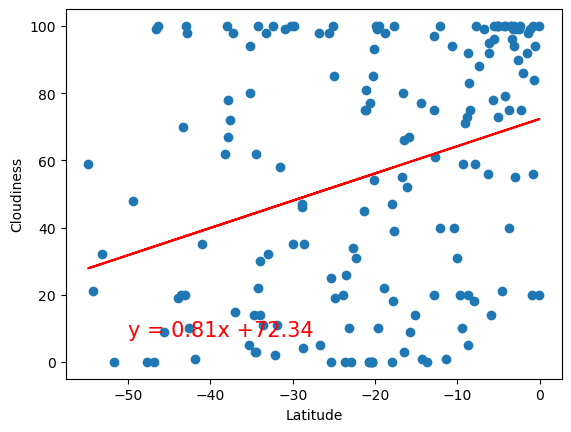

In [26]:
# Southern Hemisphere
south_lat = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Cloudiness"]
ylabel = "Cloudiness"

linregress_plots(south_lat,y_value,xlabel,ylabel)

**Discussion about the linear relationship:** As you can see it is not possible to see a meaningful correlation between the Hemispheres and Cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The Pearson Coerrelation Coefficient, r = 0.0009338276432755632
The Coefficient of Determination r-saqured = 8.720340673455924e-07


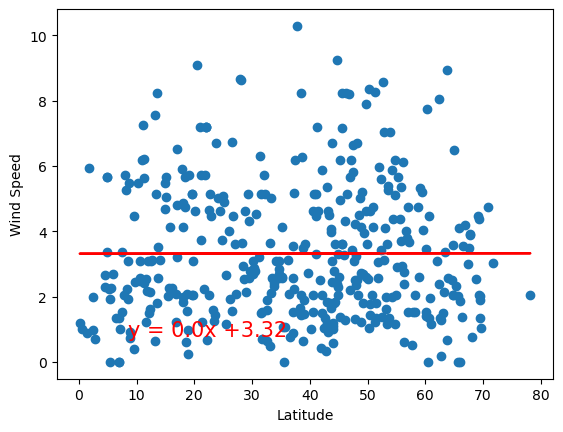

In [27]:
# Northern Hemisphere
north_lat = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Wind Speed"]
ylabel = "Wind Speed"

linregress_plots(north_lat,y_value,xlabel,ylabel)

The Pearson Coerrelation Coefficient, r = -0.20564241550607126
The Coefficient of Determination r-saqured = 0.04228880305517166


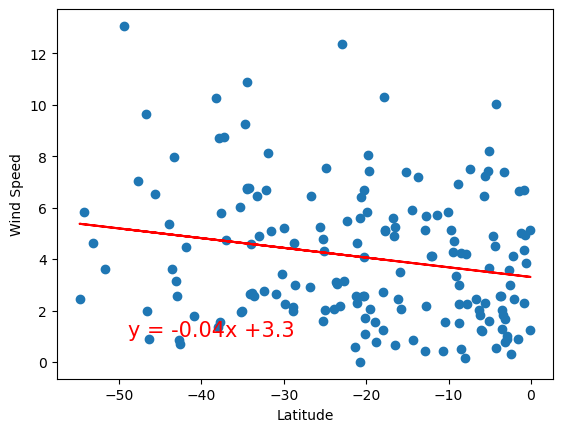

In [28]:
# Southern Hemisphere
south_lat = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Wind Speed"]
ylabel = "Wind Speed"

linregress_plots(south_lat,y_value,xlabel,ylabel)

**Discussion about the linear relationship:** As you can see it is not possible to see a meaningful correlation between the Hemispheres and Wind speed. 